# Testing Suite

This notebook represents analysis of the results from both the , and our VLM results from moondream:1.8B VLM.

In [1148]:
import pandas as pd
import matplotlib.pyplot as plt

In [1149]:
df = pd.read_csv('almond_counts.csv')

In [ ]:
df['predicted_count'] = df['predicted_count'] - 1 #offset correction which is used in the final tool

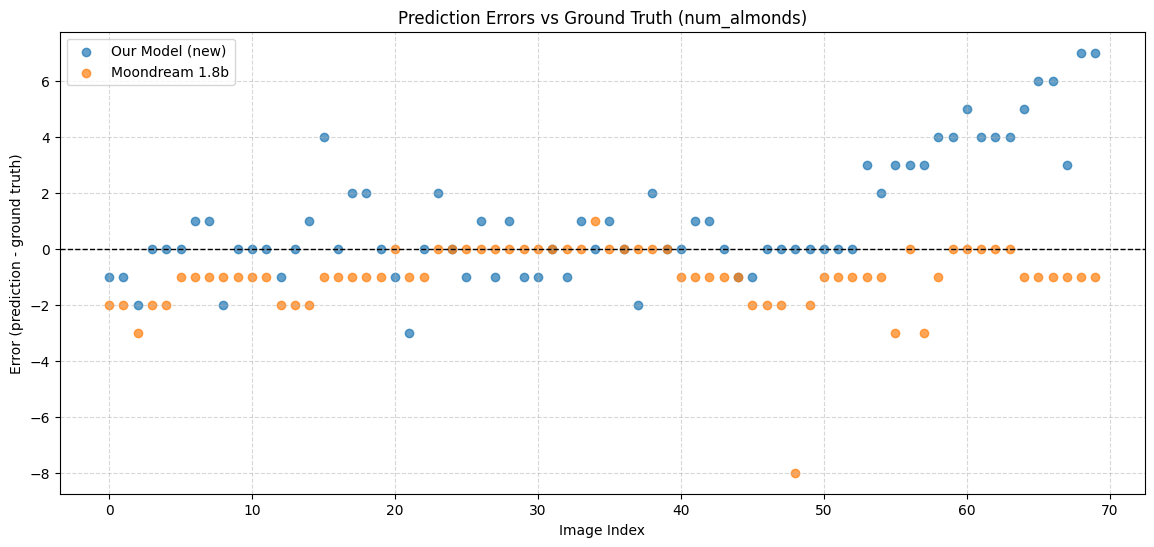

In [1160]:
import matplotlib.pyplot as plt

# Compute errors for each model
df["error_predicted_new"] = df["predicted_count"] - df["num_almonds"]
df["error_predicted_old"] = df["predicted_count_old"] - df["num_almonds"]
df["error_moondream"] = df["almond_count_moondream:1.8b"] - df["num_almonds"]

plt.figure(figsize=(14, 6))

# Scatter plots for each model
plt.scatter(df.index, df["error_predicted_new"], label="Our Model (new)", alpha=0.7)
# plt.scatter(df.index, df["error_predicted_old"], label="Our Model (old)", alpha=0.7)
plt.scatter(df.index, df["error_moondream"], label="Moondream 1.8b", alpha=0.7)

# Reference line at 0 (perfect prediction)
plt.axhline(0, color="black", linestyle="--", linewidth=1)

plt.title("Prediction Errors vs Ground Truth (num_almonds)")
plt.xlabel("Image Index")
plt.ylabel("Error (prediction - ground truth)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


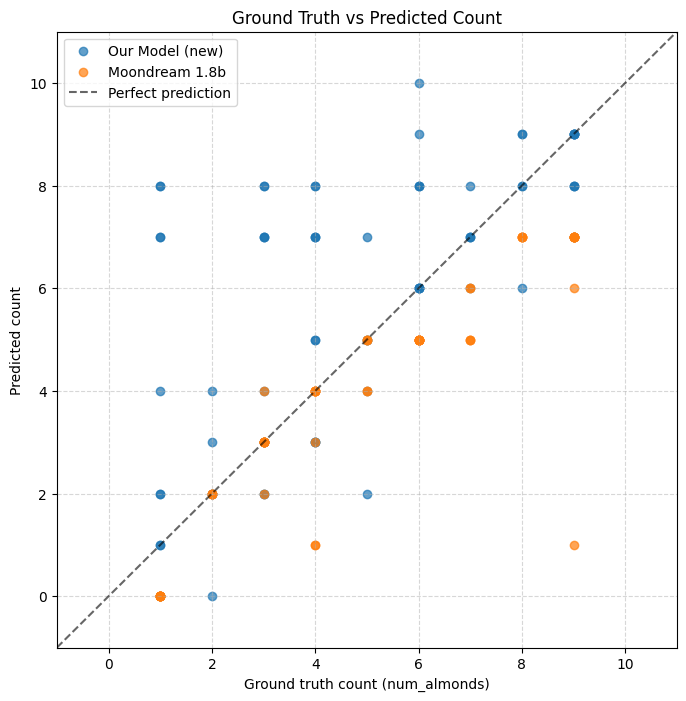

In [1161]:
plt.figure(figsize=(8, 8))

# Scatter for each model vs ground truth
plt.scatter(df["num_almonds"], df["predicted_count"], 
            label="Our Model (new)", alpha=0.7)
# plt.scatter(df["num_almonds"], df["predicted_count_old"], 
#             label="Our Model (old)", alpha=0.7)
plt.scatter(df["num_almonds"], df["almond_count_moondream:1.8b"], 
            label="Moondream 1.8b", alpha=0.7)

# Reference line y=x (perfect prediction)
lims = [
    min(df["num_almonds"].min(), df[["predicted_count","predicted_count_old","almond_count_moondream:1.8b"]].min().min()) - 1,
    max(df["num_almonds"].max(), df[["predicted_count","predicted_count_old","almond_count_moondream:1.8b"]].max().max()) + 1,
]
plt.plot(lims, lims, 'k--', alpha=0.6, label="Perfect prediction")

plt.title("Ground Truth vs Predicted Count")
plt.xlabel("Ground truth count (num_almonds)")
plt.ylabel("Predicted count")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlim(lims)
plt.ylim(lims)
plt.show()


In [1162]:
import numpy as np

# Ground truth
y_true = df["num_almonds"].values

# System 1: moondream
y_pred_moondream = df["almond_count_moondream:1.8b"].values
mae_moondream = np.mean(np.abs(y_true - y_pred_moondream))
acc_moondream = np.mean(y_true == y_pred_moondream)

# System 2: your model predictions
y_pred_model = df["predicted_count"].values
mae_model = np.mean(np.abs(y_true - y_pred_model))
acc_model = np.mean(y_true == y_pred_model)

print("=== Performance Comparison on Test Set ===")
print(f"moondream:1.8B - MAE: {mae_moondream:.2f}, Exact Match Accuracy: {acc_moondream:.2%}")
print(f"Our Model - MAE: {mae_model:.2f},      Exact Match Accuracy: {acc_model:.2%}")


=== Performance Comparison on Test Set ===
moondream:1.8B - MAE: 1.01, Exact Match Accuracy: 32.86%
Our Model - MAE: 1.63,      Exact Match Accuracy: 34.29%
